In [1]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
from shapely.geometry import Polygon
import string

In [2]:
df = pd.read_csv("UTSEUS-shanghai-flickr.csv")
df.head()

,id,latitude,longitude,owner,accuracy,woeid,year,month,day,title,tags,description,url
0,12786061,31.239682,121.497266,23804952@N00,15,22726052.0,2004,9,25,Needle in the Sky,sky 2004 architecture shanghai pearltower dscp8,"Pearl TV Tower, Shanghai",http://farm1.staticflickr.com/9/12786061_a6b55...
1,21048909,31.234380,121.494541,40264825@N00,16,22726050.0,2005,3,22,Skywards,holga cityscape shanghai,Holga Shanghai Places,http://farm1.staticflickr.com/16/21048909_3a5c...
2,21048962,31.234380,121.494541,40264825@N00,16,22726050.0,2005,6,23,Bund2,holga cityscape shanghai,Holga Shanghai Places,http://farm1.staticflickr.com/16/21048962_98b0...
3,21048995,31.234380,121.494541,40264825@N00,16,22726050.0,2005,6,23,RoomWithaView,holga cityscape shanghai hotelrooms,Holga Shanghai Places\n\nCamera: Holga 120N\n,http://farm1.staticflickr.com/15/21048995_8cd6...
4,21049047,31.234380,121.494541,40264825@N00,16,22726050.0,2004,11,30,"Bund, Early Morning (Shanghai)",holga cityscape shanghai,Camera: Holga 120N,http://farm1.staticflickr.com/15/21049047_51f8...


In [3]:
gdf = gpd.GeoDataFrame(df, geometry=[Point(x,y) for x,y in zip(df.longitude, df.latitude)])
gdf.crs = {"init" : "epsg:4326"}

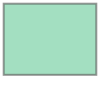

In [4]:
left, top, right, bottom = (121.10157, 30.975, 121.804611, 31.514999)
shanghai_bbox = Polygon([(left, top),(right, top),(right, bottom),(left, bottom)])
shanghai_bbox

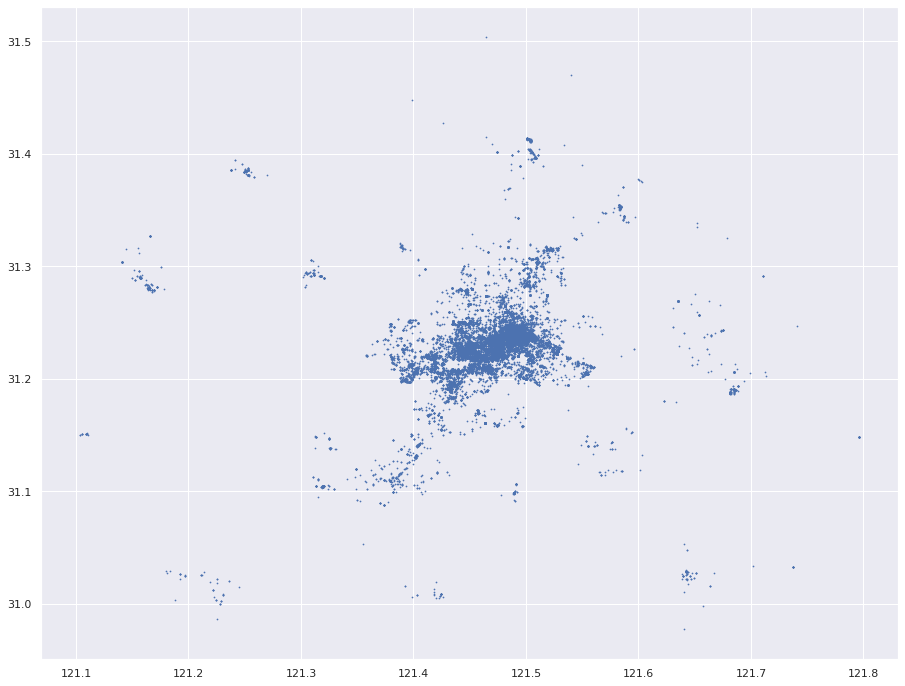

In [5]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
gdf = gdf[gdf.geometry.within(shanghai_bbox)]
gdf.plot(markersize=0.5, figsize=(18,12))

In [6]:
corpus = []

In [15]:
from bs4 import BeautifulSoup
import numpy as np
import string
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk

In [16]:
translate_table_punc = dict((ord(char), u' ') for char in string.punctuation)
translate_table_digit = dict((ord(char), None) for char in string.digits)

stops = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

In [17]:
def remove_html(text):
    return BeautifulSoup(text, 'lxml').get_text()

def remove_punc_and_digit(text):
    text = text.translate(translate_table_punc).lower()
    text = text.translate(translate_table_digit)
    return text

def tokenize(text):
    return nltk.tokenize.casual_tokenize(text)

def remove_stopwords(words):
    return [lemmatizer.lemmatize(w) for w in words if lemmatizer.lemmatize(w) is not stops]
    #return [w for w in words if lemmatizer.lemmatize(w) not is stops]
        

In [22]:
for i,v in gdf['description'].sample(100).dropna().iteritems():
    text = remove_html(v)
    text = remove_punc_and_digit(text)
    words = tokenize(text)
    print(words)
    words = remove_stopwords(words)
    print(words)
    print(" ")

['cooking', 'class']
['cooking', 'class']
 
['上海国际马拉松赛公里处', 'shanghai', 'international', 'marathon', 'km']
['上海国际马拉松赛公里处', 'shanghai', 'international', 'marathon', 'km']
 
['shanghai', 'april']
['shanghai', 'april']
 
['上海国际马拉松赛公里处', 'shanghai', 'international', 'marathon', 'km']
['上海国际马拉松赛公里处', 'shanghai', 'international', 'marathon', 'km']
 
[]
[]
 
['shanghai', 'acrobatic', 'show', 'shanghai', 'china']
['shanghai', 'acrobatic', 'show', 'shanghai', 'china']
 
['shanghai', 'april']
['shanghai', 'april']
 
['鲜虾云吞面', '新澳茶厅', '定西路', '・', '上海', 'nov']
['鲜虾云吞面', '新澳茶厅', '定西路', '・', '上海', 'nov']
 
['shanghai', 'china', 'may']
['shanghai', 'china', 'may']
 
['shanghai', 'china']
['shanghai', 'china']
 
['shanghai', 'china', '–', 'november', '✈', 'miemo', 'net', 'instagram', 'vsco', 'grid', 'behance', 'twitter', '↩']
['shanghai', 'china', '–', 'november', '✈', 'miemo', 'net', 'instagram', 'vsco', 'grid', 'behance', 'twitter', '↩']
 
['je', 'hebt', 'verschillende', 'uitkijkplatforms', 'maar', 